# Power/inverse iteration

## Rayleigh quotient

Suppose $A$ is $m\times m$. We can define a function called the **Rayleigh quotient**,

$$ r(v) = \frac{v^*Av}{v^*v}, $$

for all $v\in\mathbb{C}^m$. As shown in the text, if $A$ is hermitian then the eigenvectors of $A$ the stationary points of $r$. More specifically, if $v$ is close to an eigenvector $x$ with eigenvalue $\lambda$, then 

$$ |r(v)-\lambda| = O\bigl( \|v-x\|_2 \bigr) $$

in general, and 

$$ |r(v)-\lambda| = O\bigl( \|v-x\|_2^2 \bigr) $$

if $A$ is hermitian. Thus we can turn an eigenvector estimate into an eigenvalue estimate, and in the hermitian case, the eigenvalue estimate is *much* more accurate than the eigenvector is. (It's like going from 3 digits to 6, for instance.)

For example, let

In [1]:
A = [2 1 1; 1 3 1; 1 1 4]


A =

     2     1     1
     1     3     1
     1     1     4



In [2]:
[X,D] = eig(A);
lam = diag(D)


lam =

    1.3249
    2.4608
    5.2143



In [3]:
X


X =

    0.8877    0.2332    0.3971
   -0.4271    0.7392    0.5207
   -0.1721   -0.6318    0.7558



The max of $r(v)$ is the third eigenvector of $A$ as computed above, and close to $(0.4,0.5,0.75)$. 

In [10]:
x = X(:,3);  
v = [0.4;0.5;0.75];
evec_err = norm(x-v)


evec_err =

    0.0216



In [11]:
eval_est = v'*A*v/(v'*v)
eval_err = norm(eval_est-lam(3))


eval_est =

    5.2134


eval_err =

   9.5213e-04



In logarithmic terms (i.e. number of digits), we see the error roughly double. 

In [12]:
evec_digits = -log10(evec_err)
eval_digits = -log10(eval_err)


evec_digits =

    1.6646


eval_digits =

    3.0213



## Power iteration

Now that we can turn an eigenvector estimate into an eigenvalue estimate, we turn to finding an eigenvector. Clearly, if $A=XDX^{-1}$ and $k$ is a positive integer, then $A^k=XD^kX^{-1}$. That is, $A$ and $A^k$ share the same eigenvectors, but the eigenvalues of $A^k$ are raised to the $k$th power. So if there is an eigenvalue $\lambda_1$ such that $|\lambda_1|>|\lambda_j|$ for all $j>1$, the ratio $|\lambda_1/\lambda_j|^k\to 0$ as $k\to\infty$, and in that case $A^kv$ is dominated by the eigenvector $x_1$ that belongs with $\lambda_1$, for practically *any* vector $v$. This leads us to the **power iteration**.

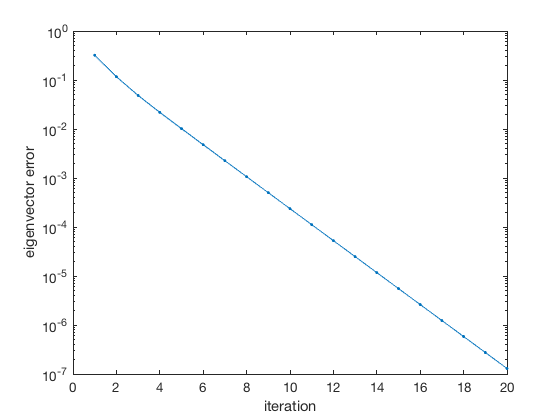

In [19]:
v = rand(3,1);
evec_err = [];
for k = 1:20
    v = v/norm(v);
    evec_err = [evec_err;min(norm(v-x),norm(v+x))];
    v = A*v;
end
semilogy(evec_err,'.-');
xlabel("iteration");
ylabel("eigenvector error");

We call this **linear convergence**. It's a straight line (as iteration goes to infinity) on a log-linear graph, or equivalently, a reduction in error by a constant factor at each step. I.e., if you suppose that $y_n \approx CK^n$ for some $K<1$, then $\log y_n \approx (\log C) + n(\log K)$. 

In [20]:
evec_err(2:end)./evec_err(1:end-1)


ans =

    0.3639
    0.4152
    0.4510
    0.4654
    0.4700
    0.4714
    0.4718
    0.4719
    0.4719
    0.4719
    0.4719
    0.4719
    0.4719
    0.4719
    0.4719
    0.4719
    0.4719
    0.4719
    0.4719



Since $A$ is symmetric, the final $v$ we got above should give an RQ eigenvalue estimate with about 12 accurate digits. 

In [21]:
abs( v'*A*v/(v'*v) - lam(3) )


ans =

   9.7700e-15



Now how much would you pay? But wait—there's more!

## Inverse iteration

If $\lambda_J$ is an eigenvalue of $A$, then $(\lambda_J-\mu)^{-1}$ is an eigenvalue of $(A-\mu I)^{-1}$, with the same eigenvector. If $\mu$ is closer to $\lambda_J$ than to any other $\lambda_j$, a power iteration on $(A-\mu I)^{-1}$ should converge very quickly. This amounts to repeatedly solving a linear system with the matrix $(A-\mu I)$.

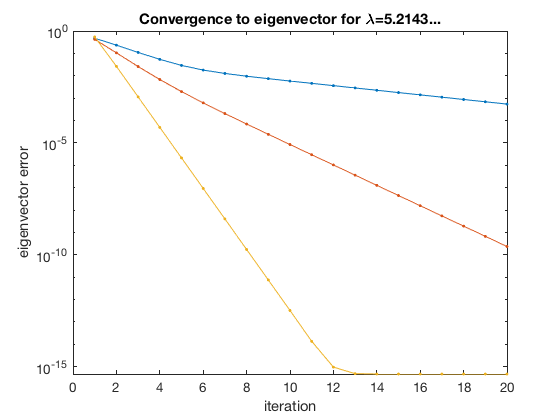

In [26]:
for mu = [4 4.5 5.1]
    [L,U] = lu(A-mu*eye(3));
    v = rand(3,1);
    for k = 1:20
        v = v/norm(v);
        evec_err(k) = min(norm(v-x),norm(v+x));
        v = U\(L\v);
    end
    semilogy(evec_err,".-"), hold on
end
xlabel("iteration");
ylabel("eigenvector error");
%legend('\mu=4','\mu=4.5','\mu=5.1');
title("Convergence to eigenvector for \lambda=5.2143...");

## Rayleigh quotient iteration

The coup de grâce is a positive feedback loop: a better shift means a better eigenvector estimate, which means a better eigenvalue estimate, which is an even better shift, etc. 

Suppose that $v=x_J+ w$ for some $w$ made up of components of the other eigenvectors, and $\|w\|=\epsilon < 1$. The RQ turns this into an eigenvector estimate/shift $\mu$ with  $|\mu-\lambda_J|=O(\epsilon)$ as well. Say that $\mu$ is $O(1)$ away from other eigenvalues (the following is all true in that relative sense). Then one step of inverse iteration leaves us with an improved eigenvector such that $\|v-x_J\|= O(\epsilon \|w\|)=O(\epsilon^2)$. This is **quadratic convergence**, which is very fast; the number of accurate digits goes 1, 2, 4, 8, 16, done.  

In the hermitian case, starting with $\|w\|=\epsilon$ means that $|\mu-\lambda_J|=O(\epsilon^2)$ initially, and the eigenvector improves to $\|v-x_J\|= O(\epsilon^2 \|w\|)=O(\epsilon^3)$. This is **cubic** convergence, which is ludicrously fast. It's so fast that we pretty much need extended precision even to verify it.